# Gaussian test notebook

This noteboox exists to keep loose track of some combinations of local runs for the Gaussian case

In [1]:
#%%
import torch
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

#self written modules
import MMD

#%%
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
#%%
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

epoch:  0  loss= tensor(0.9350, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(0.0032, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(0.0045, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0014, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(0.0019, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(0.0007, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:14.147599


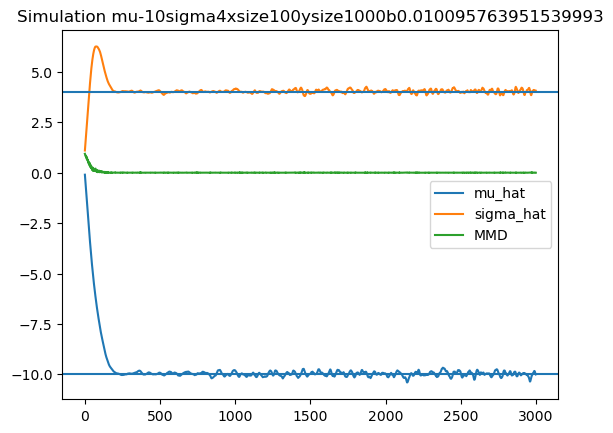

mu_hat          -10.066019
sigma_hat         4.051083
MMD               0.000695
b                 0.010096
mu_hat_MLE       -9.983074
sigma_hat_MLE     4.011837
mu_hat_MM        -9.983074
sigma_hat_MM      4.013844
sim_nr            0.000000
dtype: float64

In [3]:
#%%
######### 
# one dim case first generator

sample_size = 100
y_sample_size = 1000
nr_iterations = 3000
lr = 0.1
nr_simulations = 1



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}b{b}"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
        


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()

epoch:  0  loss= tensor(0.9699, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0016, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(0.0003, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-9.5010e-05, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(0.0021, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0021, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:11.554115


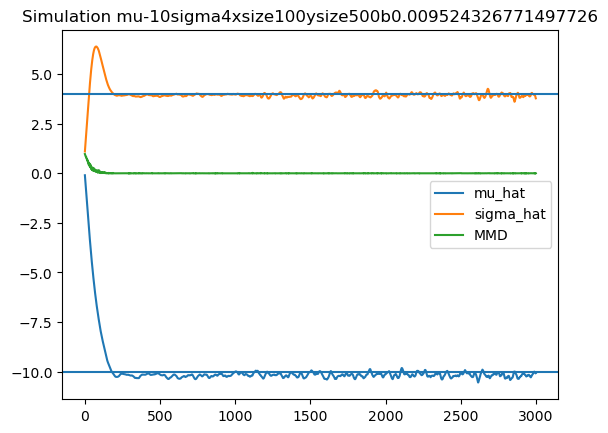

mu_hat          -10.142374
sigma_hat         3.945190
MMD              -0.000162
b                 0.009524
mu_hat_MLE      -10.193742
sigma_hat_MLE     3.937702
mu_hat_MM       -10.193743
sigma_hat_MM      3.941646
sim_nr            0.000000
dtype: float64

In [4]:
#%%

sample_size = 100
y_sample_size = 500
nr_iterations = 3000
lr = 0.1
nr_simulations = 1



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}b{b}"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    

#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()

epoch:  0  loss= tensor(0.9621, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0031, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(-0.0025, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0005, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(0.0016, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0034, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:08.595689


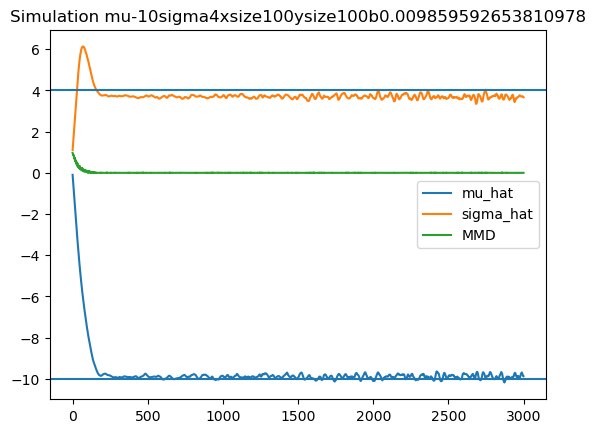

mu_hat          -9.849902
sigma_hat        3.694047
MMD             -0.002164
b                0.009860
mu_hat_MLE      -9.829082
sigma_hat_MLE    3.683675
mu_hat_MM       -9.829082
sigma_hat_MM     3.702233
sim_nr           0.000000
dtype: float64

In [5]:
#%%

sample_size = 100
y_sample_size = 100
nr_iterations = 3000
lr = 0.1
nr_simulations = 1



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}b{b}"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()

epoch:  0  loss= tensor(0.9503, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0017, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:44.999716


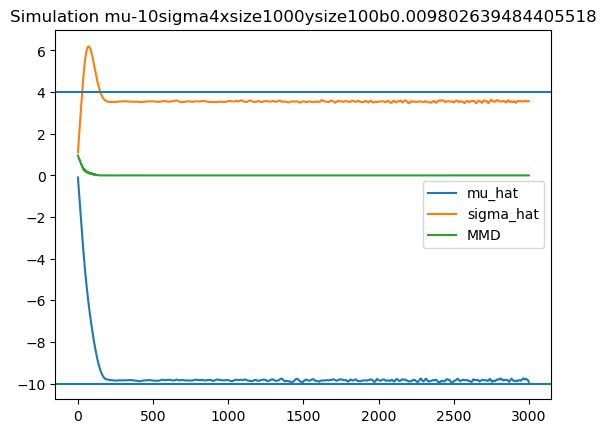

mu_hat          -9.800908
sigma_hat        3.559020
MMD             -0.001750
b                0.009803
mu_hat_MLE      -9.765606
sigma_hat_MLE    3.536631
mu_hat_MM       -9.765606
sigma_hat_MM     3.554447
sim_nr           0.000000
dtype: float64

In [6]:
#%%

sample_size = 1000
y_sample_size = 100
nr_iterations = 3000
lr = 0.1
nr_simulations = 1



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}b{b}"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    

#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()

# iterative b selection

epoch:  0  loss= tensor(0.9912, grad_fn=<SubBackward0>)


epoch:  500  loss= tensor(-0.0042, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(-0.0040, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0041, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(-0.0056, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0047, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:45.155575


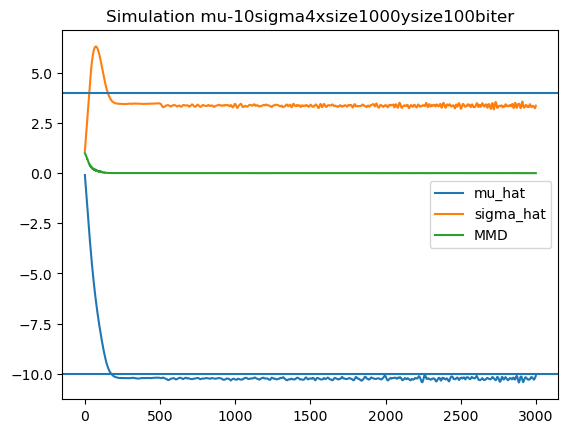

mu_hat          -10.234304
sigma_hat         3.320154
MMD              -0.004325
b                 0.009550
mu_hat_MLE      -10.230376
sigma_hat_MLE     3.469896
mu_hat_MM       -10.230376
sigma_hat_MM      3.487377
sim_nr            0.000000
dtype: float64

In [7]:
#%%

sample_size = 1000
y_sample_size = 100
nr_iterations = 3000
lr = 0.1
nr_simulations = 1



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

b_update = 500
# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}biter"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer, b_update=b_update)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    

#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()

epoch:  0  loss= tensor(0.9042, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0027, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(-0.0023, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0026, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(-0.0025, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0024, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:48.883894


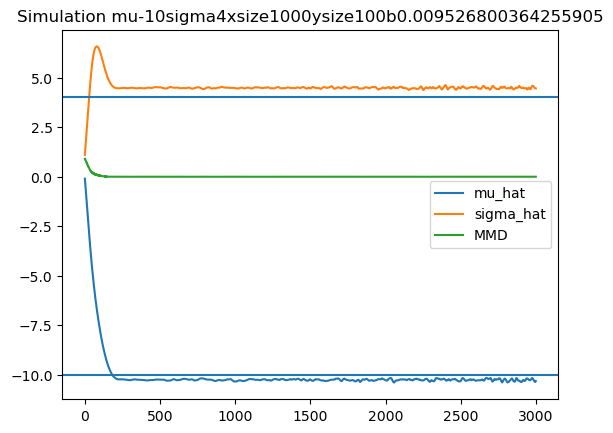

mu_hat          -10.259546
sigma_hat         4.500865
MMD              -0.002490
b                 0.009527
mu_hat_MLE      -10.206566
sigma_hat_MLE     4.474312
mu_hat_MM       -10.206566
sigma_hat_MM      4.496853
sim_nr            0.000000
dtype: float64

In [8]:
#%%

sample_size = 1000
y_sample_size = 100
nr_iterations = 3000
lr = 0.1
nr_simulations = 1



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

b_update = 0
# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}b{b}"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer, b_update=b_update)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    

#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()

In [9]:
# Test two iterations for simulation

epoch:  0  loss= tensor(0.9803, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(-0.0021, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0021, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(-0.0023, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0020, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:49.338086
epoch:  0  loss= tensor(0.9847, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0018, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(-0.0022, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  2000  loss= tensor(-0.0022, grad_fn=<SubBackward0>)
epoch:  2500  loss= tensor(-0.0022, grad_fn=<SubBackward0>)
Simulation nr 1, done in 0:00:40.542284


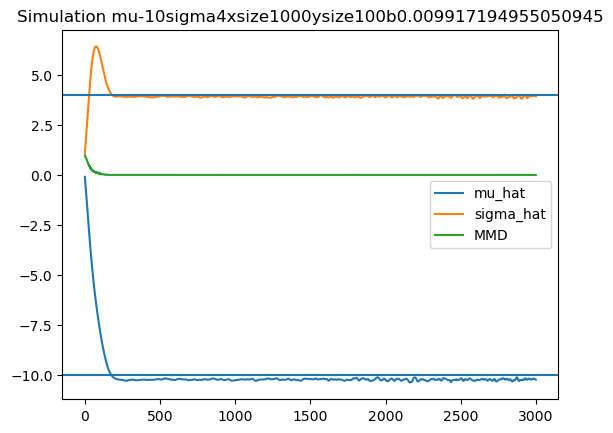

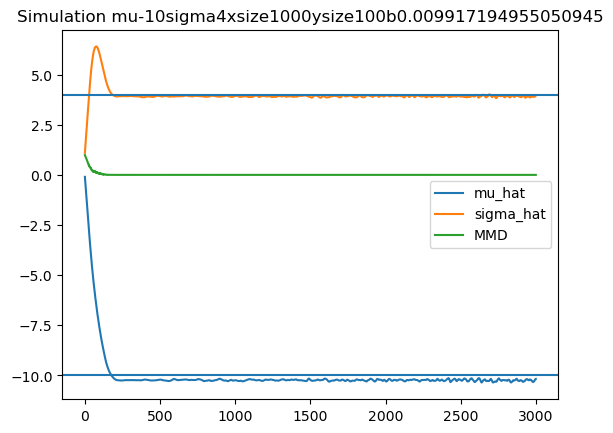

mu_hat          -10.213906
sigma_hat         3.942518
MMD              -0.002022
b                 0.009917
mu_hat_MLE      -10.352530
sigma_hat_MLE     3.901697
mu_hat_MM       -10.352530
sigma_hat_MM      3.921353
sim_nr            0.000000
dtype: float64

In [10]:
#%%

sample_size = 1000
y_sample_size = 100
nr_iterations = 3000
lr = 0.1
nr_simulations = 2



mu = -10
sigma = 4


y = torch.normal(mu,sigma,(y_sample_size,1))
#y = y.squeeze(1)

b_params = {"mu": 0,
            "sigma": 1}

b_update = 0
# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y, sample_size, "norm", device, b_params)

folder_name= "Gaussian_Test"
file_name = f"mu{mu}sigma{sigma}xsize{sample_size}ysize{y_sample_size}b{b}"


simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    mu_hat = torch.tensor([0.]).to(device).requires_grad_()
    sigma_hat = torch.tensor([1.]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([mu_hat,sigma_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})

        #get MLE
    mu_hat_MLE, std_hat_MLE = norm.fit(y)
    #get Method of Moments Estimators
    mu_hat_MM = y.mean()
    std_hat_MM = y.std()

    estimators = pd.DataFrame({"mu_hat_MLE": np.repeat(mu_hat_MLE, nr_iterations),
                               "sigma_hat_MLE": np.repeat(std_hat_MLE, nr_iterations),
                               "mu_hat_MM": np.repeat(mu_hat_MM, nr_iterations),
                               "sigma_hat_MM": np.repeat(std_hat_MM, nr_iterations)})

    simulated_df = MMD.training_loop_gauss(mu_hat,sigma_hat, y, nr_iterations, sample_size, device, b, optimizer, b_update=b_update)


    simulated_df = pd.concat([simulated_df,bandwidth,estimators,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    

#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["mu_hat", "sigma_hat", "MMD"]])
    plt.axhline(y=mu)
    plt.axhline(y=sigma)
    plt.title(f"Simulation {file_name}")
    plt.legend(["mu_hat", "sigma_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    

#%%
simulation_results

#%%
simulation_results[0].tail(50).mean()